# GENG5551 Prototype Model Training 

Run code below if using google collab for training. If not skip to next section.

run container with:
sudo docker run --gpus all -it --rm -v $(pwd):/tf/notebooks -p 8888:8888 tensorflow/tensorflow:2.12.0-gpu-jupyter

In [1]:
startup = False

In [2]:
# GB: Useless

# !pip install pandas
# !pip install scikit-learn
# !pip install seaborn
# !pip install akida==2.7.2
# !pip install cnn2snn==2.7.2
# %pip install akida-models==1.5.0
# !pip install tensorflow-addons

In [3]:
# GB: Same here
# !unzip notebooks/archive

## Dataset Preprocessing

Start here if running on anaconda virtual environment

- This section involves examining and pre-processing the data to make it suitable for use with the Akida models

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os, shutil, random

os.chdir('notebooks/Documents/GitHub/GENG5551-Akida-Chip')

In [5]:
os.getcwd()

'/tf/notebooks/Documents/GitHub/GENG5551-Akida-Chip'

In [6]:
# combine the two parts of the dataset into one folder
def combine_folders(source_folders, target_folder):
    os.makedirs(target_folder, exist_ok=True)

    for folder in source_folders:
        file_names = os.listdir(folder)
        for file_name in file_names:
            source_file_path = os.path.join(folder, file_name)
            if os.path.isfile(source_file_path):
                target_file_path = os.path.join(target_folder, file_name)
                shutil.copy(source_file_path, target_file_path)

source_folders = ['archive/HAM10000_images_part_1', 'archive/HAM10000_images_part_2']
target_folder = 'archive/data'
if startup:
    combine_folders(source_folders, target_folder)

In [7]:
# Load the metadata
metadata = pd.read_csv('archive/HAM10000_metadata.csv')

In [8]:
metadata.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [9]:
metadata['dx'].value_counts()

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

In [10]:
# There are more rows than unique lesions, so we can assume that there are multiple images for each lesion.
unique_lesion_id = metadata['lesion_id'].unique()
print("Number of rows in metadata:", len(metadata))
print('Number of unique lesions:', len(unique_lesion_id))

Number of rows in metadata: 10015
Number of unique lesions: 7470


In [11]:
# Perform train test split
from sklearn.model_selection import train_test_split
metadata['image_path'] = metadata['image_id'].apply(lambda x: os.path.join(target_folder, f"{x}.jpg"))
train_data, test_data = train_test_split(metadata, random_state=17, stratify=metadata.dx, test_size=0.10)

print(test_data['dx'].value_counts())
print(test_data.shape)

dx
nv       671
mel      111
bkl      110
bcc       51
akiec     33
vasc      14
df        12
Name: count, dtype: int64
(1002, 8)


In [12]:
metadata.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,archive/data/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,archive/data/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,archive/data/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,archive/data/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,archive/data/ISIC_0031633.jpg


In [13]:
train_data = train_data.set_index("image_id")
test_data = test_data.set_index("image_id")

train_id = list(train_data.index)
test_id = list(test_data.index)

In [14]:
if startup:
    dirs = []

    # Create train and test directory
    train_dir = os.path.join('archive/data/', "train")
    dirs.append(train_dir)
    test_dir = os.path.join('archive/data/', "test")
    dirs.append(test_dir)

    # Create training subfolders for diagnoses
    train_nv = os.path.join(train_dir, "nv")
    dirs.append(train_nv)
    train_mel = os.path.join(train_dir, "mel")
    dirs.append(train_mel)
    train_bkl = os.path.join(train_dir, "bkl")
    dirs.append(train_bkl)
    train_bcc = os.path.join(train_dir, "bcc")
    dirs.append(train_bcc)
    train_akiec = os.path.join(train_dir, "akiec")
    dirs.append(train_akiec)
    train_vasc = os.path.join(train_dir, "vasc")
    dirs.append(train_vasc)
    train_df = os.path.join(train_dir, "df")
    dirs.append(train_df)

    # Create validation subfolders for diagnoses
    validation_nv = os.path.join(test_dir, "nv")
    dirs.append(validation_nv)
    validation_mel = os.path.join(test_dir, "mel")
    dirs.append(validation_mel)
    validation_bkl = os.path.join(test_dir, "bkl")
    dirs.append(validation_bkl)
    validation_bcc = os.path.join(test_dir, "bcc")
    dirs.append(validation_bcc)
    validation_akiec = os.path.join(test_dir, "akiec")
    dirs.append(validation_akiec)
    validation_vasc = os.path.join(test_dir, "vasc")
    dirs.append(validation_vasc)
    validation_df = os.path.join(test_dir, "df")
    dirs.append(validation_df)

    for directory in dirs:
        if not os.path.exists(directory):
            os.mkdir(directory)

In [15]:
if startup:    
# move images to train and test dirs
    target_folder = 'archive/data'
    files = os.listdir(target_folder)

    for image in train_id:
        file_name = str(image + '.jpg')
        label = train_data.loc[image,'dx']

        if file_name in files:
            src = os.path.join(target_folder, file_name)
            dst = os.path.join(train_dir, label, file_name)
            shutil.copyfile(src, dst)

    for image in test_id:

        file_name = image + '.jpg'
        label = test_data.loc[image,'dx']

        if file_name in files:
            src = os.path.join(target_folder, file_name)
            dst = os.path.join(test_dir, label, file_name)
            shutil.copyfile(src, dst)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

if startup:
    # Perform data augmentation
    class_names = ["df", "mel","bkl", "bcc", "akiec", "vasc", "nv"]

    for d in class_names:
        source_dir = 'archive/data/'
        
        aug_dir = os.path.join(source_dir,'aug_dir') 
        if not os.path.exists(aug_dir):
            os.mkdir(aug_dir)
        
        img_dir = os.path.join(aug_dir, d)
        if not os.path.exists(img_dir):
            os.mkdir(img_dir)

        img_class = d

        img_list = os.listdir(source_dir + 'train/' + img_class)
        
        for i in img_list: 
            src = os.path.join(source_dir + 'train/' + img_class, i)
            dst = os.path.join(img_dir,i)
            shutil.copyfile(src, dst)


        path = aug_dir
        save_path = img_dir
        
        datagen = ImageDataGenerator(
            rotation_range=90,
            featurewise_center=True,
            featurewise_std_normalization=True,
            width_shift_range=0.2,
            height_shift_range=0.2,
            zoom_range=[0.8,1.0],
            horizontal_flip=True,
            vertical_flip=True,
            brightness_range=(0.8,1.2),
            fill_mode='reflect')
        
        batch_size = 50
        
        aug_datagen = datagen.flow_from_directory(path,
                                            save_to_dir=save_path,
                                            save_format='jpeg',
                                                save_prefix='',
                                                target_size=(224,224),
                                                color_mode='rgb',
                                                batch_size=batch_size, shuffle=False) #important Set Shuffle=False!
        
    
        
        num_wanted = 6000
        
        num_files = len(os.listdir(img_dir))
        num_batches = int(np.ceil((num_wanted-num_files)/batch_size))


        for i in range(0,num_batches):

            imgs, labels = next(aug_datagen)
        
        img_list = sorted(img_list)
        aug_list = os.listdir(img_dir)

        for number,image in enumerate(img_list):
            for filename in aug_list:
                if f"_{number}_" in filename:
                    filename_new = image[5:12] + filename
                    os.rename(os.path.join(img_dir,filename), os.path.join(img_dir,filename_new))

        for augfile in os.listdir(img_dir):
            if augfile not in img_list:
                shutil.move(img_dir + '/' + augfile, source_dir + 'train/' + img_class + '/' + augfile)

        
        shutil.rmtree(aug_dir)

2024-10-07 03:37:29.791312: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-07 03:37:29.818274: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
# Define paths for train and test datasets
train_dir = 'archive/data/train'
test_dir = 'archive/data/test'

# Define the target directories for cancerous and benign images
train_cancerous_dir = 'archive/data/train/Cancerous'
train_benign_dir = 'archive/data/train/Benign'
test_cancerous_dir = 'archive/data/test/Cancerous'
test_benign_dir = 'archive/data/test/Benign'

if startup:
    # Create the target directories if they don't exist
    os.makedirs(train_cancerous_dir, exist_ok=True)
    os.makedirs(train_benign_dir, exist_ok=True)
    os.makedirs(test_cancerous_dir, exist_ok=True)
    os.makedirs(test_benign_dir, exist_ok=True)

    # Define classes categorized as cancerous and benign
    cancerous_classes = ['akiec', 'bcc', 'mel']
    benign_classes = ['bkl', 'df', 'nv', 'vasc']

    def move_images(src_dir, dest_cancerous, dest_benign):
        for class_folder in os.listdir(src_dir):
            class_path = os.path.join(src_dir, class_folder)
            if os.path.isdir(class_path):
                # Determine if the class is cancerous or benign
                if class_folder in cancerous_classes:
                    dest_folder = dest_cancerous
                elif class_folder in benign_classes:
                    dest_folder = dest_benign
                else:
                    continue  # Skip if class is not in either category

                # Move all images from class folder to the corresponding destination folder
                for image_file in os.listdir(class_path):
                    image_path = os.path.join(class_path, image_file)
                    shutil.move(image_path, os.path.join(dest_folder, image_file))
                print(f"Moved {class_folder} images to {dest_folder}")

                # Remove the original class folder after moving images
                os.rmdir(class_path)
                print(f"Removed folder {class_path}")

    # Move images in train directory
    move_images(train_dir, train_cancerous_dir, train_benign_dir)

    # Move images in test directory
    move_images(test_dir, test_cancerous_dir, test_benign_dir)

    print("Images have been moved and original folders have been removed successfully.")

In [18]:
# scale images
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     brightness_range=[0.8, 1.2],
#     channel_shift_range=50.0
# )

train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=100,
    class_mode='sparse',
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=100,
    class_mode='sparse'
)

Found 38704 images belonging to 2 classes.
Found 1002 images belonging to 2 classes.


## Model Training

In [19]:
# GB: Change Akida version
import os
import cnn2snn
import akida as ak

# Change Akida version
os.environ["CNN2SNN_TARGET_AKIDA_VERSION"] = "v1"

# Double-check Avida version
print(' Akida version: ', cnn2snn.get_akida_version())

 Akida version:  AkidaVersion.v1


2024-10-07 03:37:31.069667: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-07 03:37:31.073207: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-07 03:37:31.073328: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [20]:
# GB: Adding compatibility check
import cnn2snn
import akida as ak

# Double-check Akida version
print('Akida version: ', cnn2snn.get_akida_version())

# And HW compatibility?
# myDevice = ak.devices()[1]
# print("Device: ", myDevice.desc)
# x = cnn2snn.check_model_compatibility(model=model_keras, device=myDevice)
# print("Non compatibilities: ", x)

Akida version:  AkidaVersion.v1


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense, ReLU
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), padding='same', kernel_initializer='he_normal', input_shape=(224, 224, 3)),
    BatchNormalization(),
    ReLU(max_value=6),  # ReLU6 activation
    Conv2D(32, (3, 3), padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    ReLU(max_value=6),
    MaxPooling2D((2, 2), padding='same'),  # Added padding='same'
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    ReLU(max_value=6),
    Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    ReLU(max_value=6),
    MaxPooling2D((2, 2), padding='same'),  # Added padding='same'
    Dropout(0.25),

    Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    ReLU(max_value=6),
    Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    ReLU(max_value=6),
    MaxPooling2D((2, 2), padding='same'),  # Added padding='same'
    Dropout(0.25),

    Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    ReLU(max_value=6),
    Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    ReLU(max_value=6),
    MaxPooling2D((2, 2), padding='same'),  # Added padding='same'
    Dropout(0.25),

    Flatten(),
    Dense(512, kernel_initializer='he_normal'),
    BatchNormalization(),
    ReLU(max_value=6),
    Dropout(0.5),
    Dense(512, kernel_initializer='he_normal'),
    BatchNormalization(),
    ReLU(max_value=6),
    Dropout(0.5),
    Dense(256, kernel_initializer='he_normal'),
    BatchNormalization(),
    ReLU(max_value=6),
    Dropout(0.5),
    Dense(256, kernel_initializer='he_normal'),
    BatchNormalization(),
    ReLU(max_value=6),
    Dropout(0.5),
])

from keras import Model
from keras.layers import Activation, Dropout, Reshape
from akida_models.layer_blocks import dense_block

# GB: Only ReLU 6 are compatible
# And no softmax as activation on last layer. It will be removed anyway.
# Didn't change it either.
base_model = model
CLASSES = 2

x = base_model.output
x = dense_block(x,
                units=512,
                name='fc1',
                add_batchnorm=True,
                # GB: Changed to ReLU 6
                #relu_activation='ReLU7.5')
                relu_activation='ReLU6')
x = Dropout(0.5, name='dropout_1')(x)
x = dense_block(x,
                units=CLASSES,
                name='predictions',
                add_batchnorm=False,
                relu_activation=False)

# GB: Softmax is impossible here
# x = Activation('softmax', name='act_softmax')(x)

x = Reshape((CLASSES,), name='reshape')(x)

# Build the model
model_keras = Model(base_model.input, x, name='akidanet_derma')

model_keras.summary()

Model: "akidanet_derma"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8_input (InputLayer)  [(None, 224, 224, 3)]    0         
                                                                 
 conv2d_8 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_12 (Bat  (None, 224, 224, 32)     128       
 chNormalization)                                                
                                                                 
 re_lu_12 (ReLU)             (None, 224, 224, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_13 (Bat  (None, 224, 224, 32)     128       
 chNormalization)                                   

Epoch 1/60


2024-10-07 03:38:14.884779: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-10-07 03:38:16.296062: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inakidanet_derma/dropout_8/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-10-07 03:38:16.613987: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2024-10-07 03:38:18.041195: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-10-07 03:38:18.074142: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x76e2921f5

388/388 [==============================] - ETA: 0s - loss: 0.8343 - accuracy: 0.5412

2024-10-07 03:39:43.920591: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


388/388 [==============================] - 92s 210ms/step - loss: 0.8343 - accuracy: 0.5412 - val_loss: 0.7492 - val_accuracy: 0.4082 - lr: 1.0000e-04
Epoch 2/60
388/388 [==============================] - 82s 211ms/step - loss: 0.6636 - accuracy: 0.6297 - val_loss: 0.4800 - val_accuracy: 0.7784 - lr: 1.0000e-04
Epoch 3/60
388/388 [==============================] - 82s 210ms/step - loss: 0.5994 - accuracy: 0.6671 - val_loss: 0.4532 - val_accuracy: 0.7864 - lr: 1.0000e-04
Epoch 4/60
388/388 [==============================] - 82s 210ms/step - loss: 0.5586 - accuracy: 0.6956 - val_loss: 0.4617 - val_accuracy: 0.8064 - lr: 1.0000e-04
Epoch 5/60
388/388 [==============================] - 82s 211ms/step - loss: 0.5406 - accuracy: 0.7162 - val_loss: 0.4519 - val_accuracy: 0.7954 - lr: 1.0000e-04
Epoch 6/60
388/388 [==============================] - 81s 208ms/step - loss: 0.5231 - accuracy: 0.7283 - val_loss: 0.4581 - val_accuracy: 0.7994 - lr: 1.0000e-04
Epoch 7/60
388/388 [===================

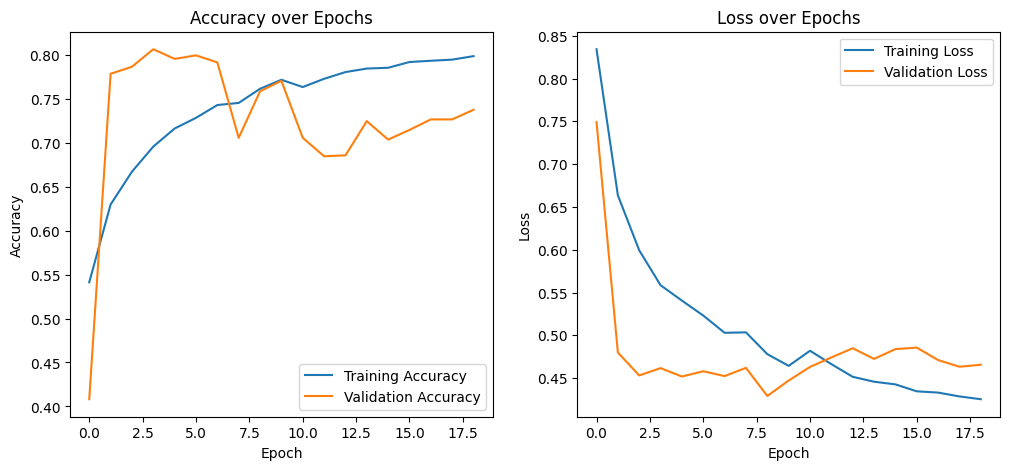

In [24]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow_addons as tfa
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


model_keras.compile(Adam(learning_rate=0.0001), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
# Setting up callbacks for saving the model and early stopping
checkpoint_cb = ModelCheckpoint(
    'akidanet_derma_best.h5', save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# GB: To change nb of epochs 
# (on CPU, 1 epoch lasts 22 min, so 10 is 4 hours long)
EPOCHS = 60 # Initial value: 10

# Training the model
history = model_keras.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=test_gen,
    callbacks=[checkpoint_cb, reduce_lr, early_stopping])


# Optionally, plot the training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

2024-10-07 04:04:13.945183: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


388/388 [==============================] - 39s 100ms/step


2024-10-07 04:04:53.410439: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


11/11 [==============================] - 3s 240ms/step


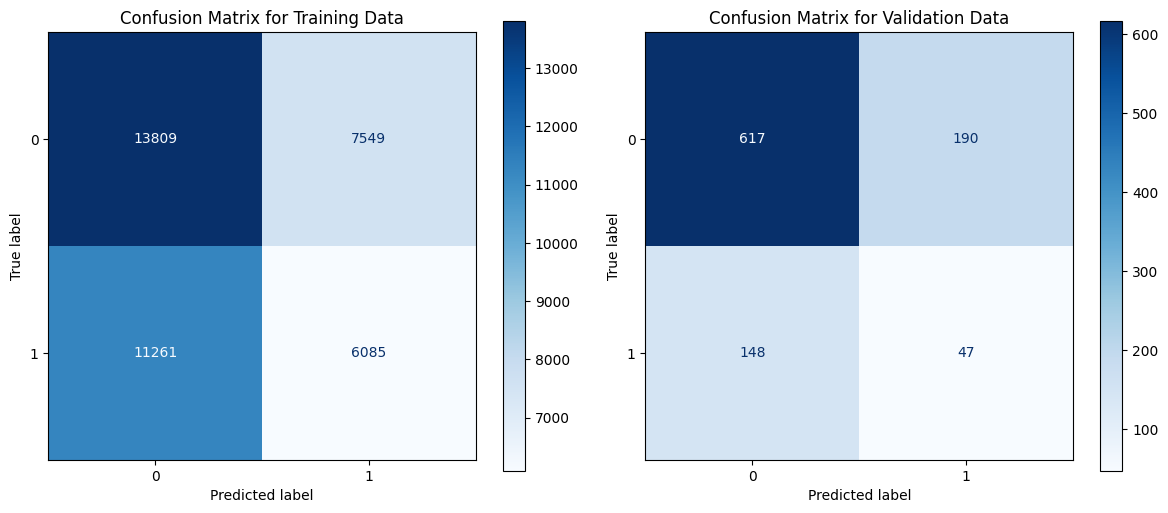

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtain predictions for the training and validation datasets
train_predictions = np.argmax(model_keras.predict(train_gen), axis=-1)
val_predictions = np.argmax(model_keras.predict(test_gen), axis=-1)

# Get true labels from the generators
train_labels = train_gen.classes
val_labels = test_gen.classes

# Compute confusion matrices
train_cm = confusion_matrix(train_labels, train_predictions)
val_cm = confusion_matrix(val_labels, val_predictions)

# Plot confusion matrix for training data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
ConfusionMatrixDisplay(confusion_matrix=train_cm).plot(cmap='Blues', ax=plt.gca())
plt.title('Confusion Matrix for Training Data')

# Plot confusion matrix for validation data
plt.subplot(1, 2, 2)
ConfusionMatrixDisplay(confusion_matrix=val_cm).plot(cmap='Blues', ax=plt.gca())
plt.title('Confusion Matrix for Validation Data')

plt.tight_layout()
plt.show()

In [27]:
IMG_SIZE = 224

# Function to convert generator to tf.data.Dataset
def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

# Create a Dataset from the generator
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_gen,
    output_signature=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.int32)
    )
)

train_dataset = train_dataset.map(format_example, num_parallel_calls=tf.data.AUTOTUNE)

# Define batch size and batch the dataset
BATCH_SIZE = 16
train_batches = train_dataset.unbatch().batch(BATCH_SIZE)

## Quantize Model

In [28]:
from quantizeml.models import quantize, QuantizationParams, dump_config

# Prepare a quantization scheme: first layer weights to 8-bit, other weights and activation to 4-bit

# GB: Parameter per_tensor_activation = False, really? fot v1 models, you need to set this parameter to True, by default, it's False-> quantizeml.models.quantize(..., per_tensor_activations=False)
#qparams = QuantizationParams(input_weight_bits=8, weight_bits=4, activation_bits=4)
qparams = QuantizationParams(input_weight_bits=8, per_tensor_activations=True, weight_bits=4, activation_bits=4)

# Quantize the model, using the 1024 calibration samples from the train set and calibrate over 2
# epochs with a batch_size of 100.
model_quantized = quantize(model_keras, qparams=qparams, 
                           samples=train_batches, epochs=2, batch_size=BATCH_SIZE, num_samples=1024)


2024-10-07 04:07:04.342403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


64/64 [==============================] - 1s 16ms/step


In [29]:
test_dataset = tf.data.Dataset.from_generator(
    lambda: test_gen,
    output_signature=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.int32)
    )
)

test_dataset = test_dataset.map(format_example, num_parallel_calls=tf.data.AUTOTUNE)

# Define batch size and batch the dataset
BATCH_SIZE = 32
test_batches = test_dataset.unbatch().batch(BATCH_SIZE)

In [30]:
import numpy as np

def generator_to_numpy(generator):
    images_list = []
    labels_list = []

    # Iterate through the generator
    for _ in range(len(generator)):
        images, labels = generator.next()
        images_list.append(images)
        labels_list.append(labels)

    # Concatenate lists into numpy arrays
    x_test = np.concatenate(images_list, axis=0)
    labels_test = np.concatenate(labels_list, axis=0)

    return x_test, labels_test

# Example usage with test_gen
x_test, labels_test = generator_to_numpy(test_gen)

# Ensure the shapes are correct
print(x_test.shape)  # Should be (num_samples, 224, 224, 3)
print(labels_test.shape)  # Should be (num_samples,)


(1002, 224, 224, 3)
(1002,)


11/11 [==============================] - 4s 149ms/step
Keras inference on 1002 images took 4.15 s.

Keras accuracy: 700/1002.


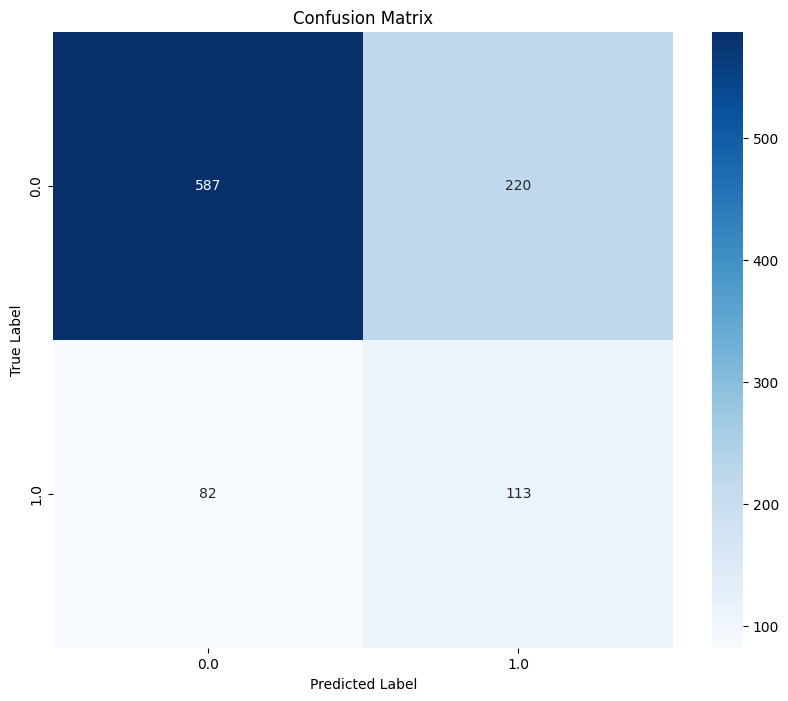

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from timeit import default_timer as timer

# Compile the model with the specified metric
model_quantized.compile(metrics=['accuracy'])

# Get the number of images in the test dataset
num_images = len(x_test)

# Measure the time taken for Keras inference
start = timer()
potentials_keras = model_quantized.predict(x_test, batch_size=100)
end = timer()
print(f'Keras inference on {num_images} images took {end-start:.2f} s.\n')

# Get the predicted labels from the model output
preds_keras = np.squeeze(np.argmax(potentials_keras, 1))

# Calculate the accuracy
accuracy_keras = np.sum(np.equal(preds_keras, labels_test)) / num_images
print(f"Keras accuracy: {accuracy_keras*num_images:.0f}/{num_images}.")

# Generate the confusion matrix
cm = confusion_matrix(labels_test, preds_keras)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels_test), yticklabels=np.unique(labels_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [32]:
# GB: Adding Keras Floating-point accuracy to compare with previous one

model_keras.compile(metrics=['accuracy'])

num_images = len(x_test)

start = timer()
potentials_keras = model_keras.predict(x_test, batch_size=100)
end = timer()
print(f'Keras inference on {num_images} images took {end-start:.2f} s.\n')

preds_keras = np.squeeze(np.argmax(potentials_keras, 1))
accuracy_keras = np.sum(np.equal(preds_keras, labels_test)) / num_images
print(f"Keras accuracy: {accuracy_keras*num_images:.0f}/{num_images}.")

11/11 [==============================] - 1s 49ms/step
Keras inference on 1002 images took 0.95 s.

Keras accuracy: 760/1002.


In [33]:
# GB: Name changed
model_quantized.save('model_quantized_v1.h5')

In [34]:
import numpy as np
from cnn2snn import convert

model_akida = convert(model_quantized)


In [35]:
model_akida.summary()

                 Model Summary                  
________________________________________________
Input shape    Output shape  Sequences  Layers
[224, 224, 3]  [1, 1, 2]     1          14    
________________________________________________

___________________________________________________________
Layer (type)           Output shape    Kernel shape      

============ SW/conv2d_8-predictions (Software) ===========

conv2d_8 (InputConv.)  [224, 224, 32]  (3, 3, 3, 32)     
___________________________________________________________
conv2d_9 (Conv.)       [112, 112, 32]  (3, 3, 32, 32)    
___________________________________________________________
conv2d_10 (Conv.)      [112, 112, 64]  (3, 3, 32, 64)    
___________________________________________________________
conv2d_11 (Conv.)      [56, 56, 64]    (3, 3, 64, 64)    
___________________________________________________________
conv2d_12 (Conv.)      [56, 56, 128]   (3, 3, 64, 128)   
________________________________________________

In [36]:
# GB: I do not understand this block, I guess you skip it in normal flow, or you start here ...

# from tensorflow.keras.models import load_model
# from akida_models import load_model

# model_path = 'model_akida_v1.fbz'
# model_akida = load_model(model_path)

# model_akida.summary()

In [37]:
# GB: Change model name to v1
model_akida.save('model_akida_v1.fbz')

In [38]:
# GB: Get device (again)
# myDevice = ak.devices()[1]
# print('Device: ', myDevice.desc)
# model_akida.map(myDevice)
# model_akida.summary()

In [39]:
# Check Model performance
start = timer()
accuracy_akida = model_akida.evaluate(x_test, labels_test)
end = timer()
print(f'Inference on {num_images} images took {end-start:.2f} s.\n')
print(f"Accuracy: {accuracy_akida*num_images:.0f}/{num_images}.")

Inference on 1002 images took 14.52 s.

Accuracy: 704/1002.


In [40]:
import numpy as np


# Get the class indices for each sample
class_indices = test_gen.classes

# Get the mapping from class names to indices
class_indices_mapping = test_gen.class_indices

# Create a reverse mapping from indices to class names
index_to_class = {v: k for k, v in class_indices_mapping.items()}

# Count the number of samples for each class
class_counts = np.bincount(class_indices)

# Print the number of samples for each class
print("Number of samples:", test_gen.samples)
print("Number of samples per class in the test generator:")
for class_index, count in enumerate(class_counts):
    class_name = index_to_class[class_index]
    print(f"{class_name}: {count}")


Number of samples: 1002
Number of samples per class in the test generator:
Benign: 807
Cancerous: 195


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0, 0, 0, 0, 0]
[1. 1. 1. 1. 1. 0.]
['Cancerous', 'Cancerous', 'Cancerous', 'Cancerous', 'Cancerous', '']
Akida outputs: [ 0.74689454 -0.9131143 ]
True label: Cancerous
Predicted label: Cancerous


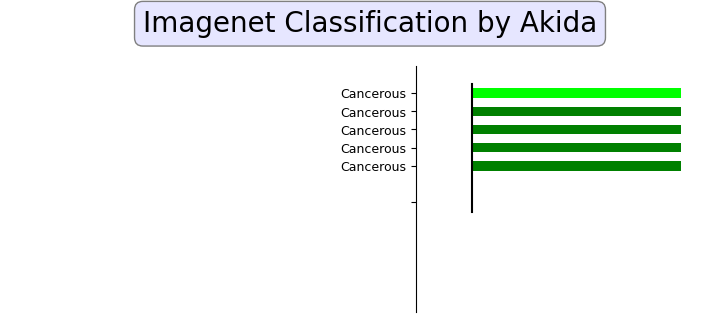

In [41]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from akida_models.imagenet import preprocessing

class_names = ['Cancerous', 'Benign']

IMAGE_SIZE = 224
NUM_CHANNELS = 3

# Functions used to display the top5 results
def get_top5(potentials, true_label):
    """
    Returns the top 5 classes from the output potentials
    """
    tmp_pots = potentials.copy()
    top5 = []
    min_val = np.min(tmp_pots)
    for ii in range(5):
        best = np.argmax(tmp_pots)
        top5.append(best)
        tmp_pots[best] = min_val

    vals = np.zeros((6,))
    vals[:5] = potentials[top5]

    if true_label not in top5:
        vals[5] = potentials[true_label]
    else:
        vals[5] = 0

    vals /= np.max(vals)

    class_name = []
    for ii in range(5):
        class_name.append(class_names[top5[ii]])
    if true_label in top5:
        class_name.append('')
    else:
        class_name.append(
            class_names[true_label])

    return top5, vals, class_name


def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # outward by 10 points
        else:
            spine.set_color('none')  # don't draw spine
    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])
    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])


def prepare_plots():
    fig = plt.figure(figsize=(8, 4))
    # Image subplot
    ax0 = plt.subplot(1, 3, 1)
    imgobj = ax0.imshow(np.zeros((IMAGE_SIZE, IMAGE_SIZE, NUM_CHANNELS), dtype=np.uint8))
    ax0.set_axis_off()
    # Top 5 results subplot
    ax1 = plt.subplot(1, 2, 2)
    bar_positions = (0, 1, 2, 3, 4, 6)
    rects = ax1.barh(bar_positions, np.zeros((6,)), align='center', height=0.5)
    plt.xlim(-0.2, 1.01)
    ax1.set(xlim=(-0.2, 1.15), ylim=(-1.5, 12))
    ax1.set_yticks(bar_positions)
    ax1.invert_yaxis()
    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks([])
    adjust_spines(ax1, 'left')
    ax1.add_line(lines.Line2D((0, 0), (-0.5, 6.5), color=(0.0, 0.0, 0.0)))
    # Adjust Plot Positions
    ax0.set_position([0.05, 0.055, 0.3, 0.9])
    l1, b1, w1, h1 = ax1.get_position().bounds
    ax1.set_position([l1 * 1.05, b1 + 0.09 * h1, w1, 0.8 * h1])
    # Add title box
    plt.figtext(0.5,
                0.9,
                "Imagenet Classification by Akida",
                size=20,
                ha="center",
                va="center",
                bbox=dict(boxstyle="round",
                          ec=(0.5, 0.5, 0.5),
                          fc=(0.9, 0.9, 1.0)))

    return fig, imgobj, ax1, rects


def update_bars_chart(rects, vals, true_label):
    counter = 0
    for rect, h in zip(rects, yvals):
        rect.set_width(h)
        if counter < 5:
            if top5[counter] == true_label:
                if counter == 0:
                    rect.set_facecolor((0.0, 1.0, 0.0))
                else:
                    rect.set_facecolor((0.0, 0.5, 0.0))
            else:
                rect.set_facecolor('gray')
        elif counter == 5:
            rect.set_facecolor('red')
        counter += 1


# Prepare plots
fig, imgobj, ax1, rects = prepare_plots()

# Get a random image
img = np.random.randint(num_images)

# Predict image class
outputs_akida = model_akida.predict(np.expand_dims(x_test[img].astype(np.uint8), axis=0)).squeeze()

# Get top 5 prediction labels and associated names
true_label = labels_test[img]

# GB: Added, because of last layer activation function
true_label = int(true_label)

top5, yvals, class_name = get_top5(outputs_akida, true_label)
print(top5)
print(yvals)
print(class_name)

print("Akida outputs:", outputs_akida)
print("True label:", class_names[int(true_label)])
print("Predicted label:", class_names[np.argmax(outputs_akida)])

# Draw Plots
imgobj.set_data(x_test[img])
ax1.set_yticklabels(class_name, rotation='horizontal', size=9)
update_bars_chart(rects, yvals, true_label)
fig.canvas.draw()
plt.show()